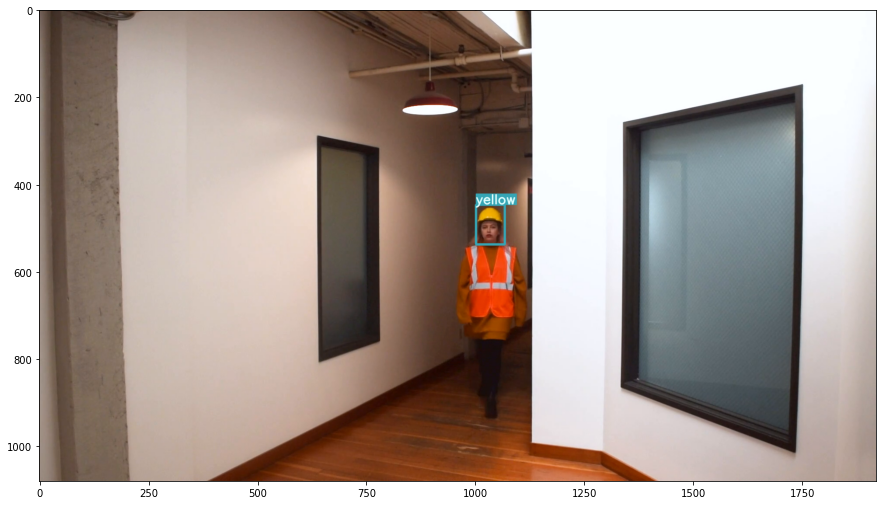

AttributeError: 'Reader' object has no attribute 'release'

In [37]:
import sys
import time 
import imageio
import base64
import requests
import matplotlib.pyplot as plt
from IPython.display import clear_output
import cv2

def plot_one_box(x, img, color=None, label=None, line_thickness=None):
    # Plots one bounding box on image img
    tl = line_thickness or round(0.002 * (img.shape[0] + img.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(img, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(label, 0, fontScale=tl / 3, thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(img, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(img, label, (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)

        
        
VIDEO_URL = "data/Safety_Full_Hat_and_Vest.mp4"
url = 'http://0.0.0.0:7778/'
# prepare headers for http request
content_type = 'image/jpeg'
headers = {'content-type': content_type}

keys = ['xmin', 'ymin', 'xmax', 'ymax']

plt.ion()

vid = imageio.get_reader(VIDEO_URL,  'ffmpeg')
frame_num = 0 
while(True):
    try:
        frame_start_time = time.time()

        # encode image as jpeg
        frame_num += 10
        image = vid.get_data(frame_num)
        img_str = cv2.imencode('.jpg', image)[1].tostring()
        
        # send http request with image and receive response
        request_time_start = time.time()
        response = requests.post(url, files={"image":img_str}, data={'meta_information': frame_num})
        request_time = time.time() - request_time_start
        print('Request FPS:', 1.0 / request_time)

        
        # Нарисовать боксы на изображении
        res = response.json()
        for num in range(res['heads_amount']):
            bbox_dict = res['heads'][num]['bbox']
            bbox = [bbox_dict.get(key) for key in keys]
            label = res['heads'][num]['label']
            plot_one_box(bbox, image, label=label, color=[53, 165, 181], line_thickness=3)
       
        total_time = time.time() - frame_start_time
        print('Total FPS:', 1.0 / total_time)
        print('        ***       ')
        
        clear_output(wait=True)
        fig = plt.figure(figsize=(15,15))
        plt.imshow(image)
        plt.show()
        
    except KeyboardInterrupt:
        vid.release()

In [34]:
import torchvision
torchvision.__version__

'0.7.0'

In [36]:
import torch
torch.__version__

'1.6.0'